In [1]:
from astroquery.jplhorizons import Horizons
from astroquery.jplsbdb import SBDB
from astropy.table import QTable
import astropy.units as u
import re

import pandas as pd
import numpy as np
import requests
from pprint import pprint
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
def get_horizons_ephemerides(name,pov,epoch_start,epoch_stop,step_size,idx_elements):
    
    # step: step size, [10m, 1d, 1y]
    
    if pov.lower() == 'sun':
        loc = '500@10' # position relative to the sun
    elif pov.lower() == 'goldstone':
        loc = '257' # from goldstone
    elif pov.lower() == 'maunakea':
        loc = '568' # maunakea
    else:
        print('Not Valid Location Point Of View')
    
    # Process to get homogeneity from main script full name '2012QD8' to a valid name for Horizon call '2012 QD8'
    if len(re.findall('([0-9])', name)) <= 4: # 4 is the min numbers in every name, the date year of discovery
        r = re.compile("([0-9]+)([a-zA-Z]+)").match(name)
        k1 = r.group(1) # the date of the name
        k2 = r.group(2) # the code of the date
        valid_name = k1 + " " + k2 
    else:
        r = re.compile("([0-9]+)([a-zA-Z]+)([0-9]+)").match(name)
        k1 = r.group(1) # the date of the name
        k2 = r.group(2) # the code of the date
        k3 = r.group(3) # id after the letters
        valid_name = k1 + " " + k2 + k3
    
    obj = Horizons(id=valid_name, 
               location=loc, 
               epochs={'start': epoch_start, 'stop':epoch_stop,
                       'step': step_size})
    
    if idx_elements.lower() == 'vectors':
        data = obj.vectors() # vectorial elements
    elif idx_elements.lower() == 'ephemerides':
        data = obj.ephemerides()
        
    return data

In [3]:
def get_earth_ephemerides(epoch_start,epoch_stop,step_size,idx_elements):
    
    # step: step size, [10m, 1d, 1y]

    obj = Horizons(id = 'Geocenter', 
               location = '500@10', 
               epochs = {'start': epoch_start, 'stop':epoch_stop,
                       'step': step_size},
               id_type = 'majorbody')
    
    if idx_elements.lower() == 'vectors':
        data = obj.vectors() # vectorial elements
    elif idx_elements.lower() == 'ephemerides':
        data = obj.ephemerides()
        
    return data

In [4]:
def plot_orbits(data,kolor):
    X = data['x']
    Y = data['y']
    Z = data['z']
    
    #fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    #ax.set_box_aspect((np.ptp(X), np.ptp(Y), np.ptp(Z))) # to set equivalent to axis equal
    ax.plot(X,Y,Z, label=data['targetname'][0], color=kolor)
    ax.legend()
    
    ax.xaxis.set_rotate_label(False) 
    ax.yaxis.set_rotate_label(False) 
    ax.zaxis.set_rotate_label(False) 
    ax.set_xlabel('$X$ [AU]')
    ax.set_ylabel('$Y$ [AU]')
    #ax.yaxis._axinfo['label']['space_factor'] = 3.0
    # set z ticks and labels
    #ax.set_zticks([-2, 0, 2])
    # disable auto rotation
    ax.set_zlabel('$Z$ [AU]')
    
    return ax

In [5]:
# Earth Basic ephemerides
epoch_start = '2021-01-01'
epoch_stop = '2022-01-01'
step = '5d'
idx_elements = 'Vectors'

data_Earth = get_earth_ephemerides(epoch_start,epoch_stop,step,idx_elements)

In [ ]:
name = '2012QD8'
PointOfView = 'Sun'
epoch_start = '2021-01-01'
epoch_stop = '2024-01-01'
step = '5d'
idx_elements = 'Vectors'

data_2012QD8 = get_horizons_ephemerides(name,PointOfView,epoch_start,epoch_stop,step,idx_elements)

In [ ]:
fig = plt.figure()
ax_Earth = plot_orbits(data_Earth,'gray')
ax_2012QD8 = plot_orbits(data_2012QD8,'blue')
#plt.show()


In [ ]:
# to delete
def export_excel(data,file_name):
    path = f'./{file_name}.xlsx'
    
    df={}
    for i in range(len(data)):
        df[i] = pd.DataFrame(data[i])
        df[i].to_excel(path, sheet_name=data[i]['fullname'][0],index=False)
        #, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True, freeze_panes=None, storage_options=None
        
    

In [ ]:
export_excel(data,'astee')

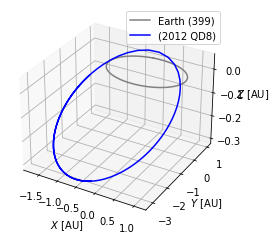

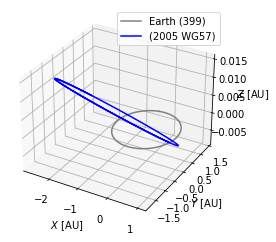

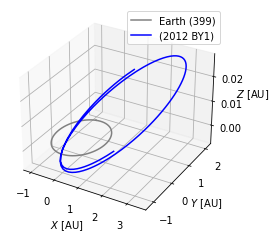

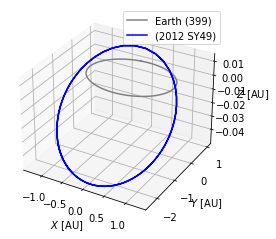

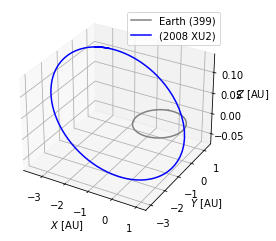

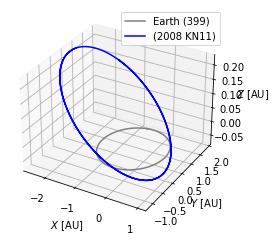

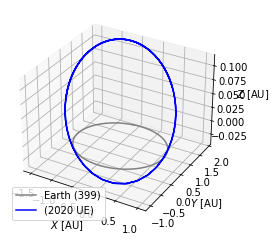

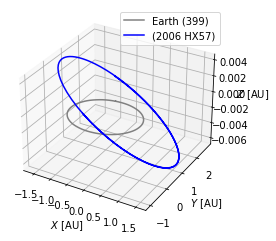

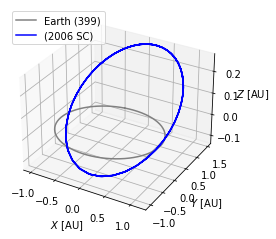

In [20]:
asteroids = ['2012QD8','2005WG57','2012BY1','2012SY49','2008XU2','2008KN11','2020UE','2006HX57','2006SC']

PointOfView = 'Sun'
epoch_start = '2021-01-01'
epoch_stop = '2025-01-01'
step = '10d'
idx_elements = 'Vectors'

#colors = ['black','aqua','green','orange','yellow']
data = {}
j=0

for ast in asteroids:
    elements = get_horizons_ephemeris(asteroids[j],PointOfView,epoch_start,epoch_stop,step,idx_elements)
    data_dict = {"fullname": elements['targetname'],
                 "x": elements['x'],
                 "y": elements['y'],
                 "z": elements['z'],
                };
    data[j]=data_dict
    j = j+1
    fig = plt.figure()
    plot_orbits(data_Earth,'gray')
    plot_orbits(elements,'blue')
    save_name = elements['targetname'][0]
    plt.savefig(f'./Figures/Orbits/{save_name}.png',bbox_inches='tight')